In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [3]:
import pandas as pd
import sklearn

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

data = pd.read_csv('Dax_data.csv', parse_dates=['Date'], index_col='Date')
data.reset_index(inplace=True)

print(data.head(2))

        Date         Open         High          Low        Close    Adj Close  \
0 2004-03-15  3908.610107  3909.870117  3807.939941  3810.760010  3810.760010   
1 2004-03-16  3810.879883  3851.010010  3775.110107  3822.370117  3822.370117   

        Volume  
0  115597900.0  
1  142442300.0  


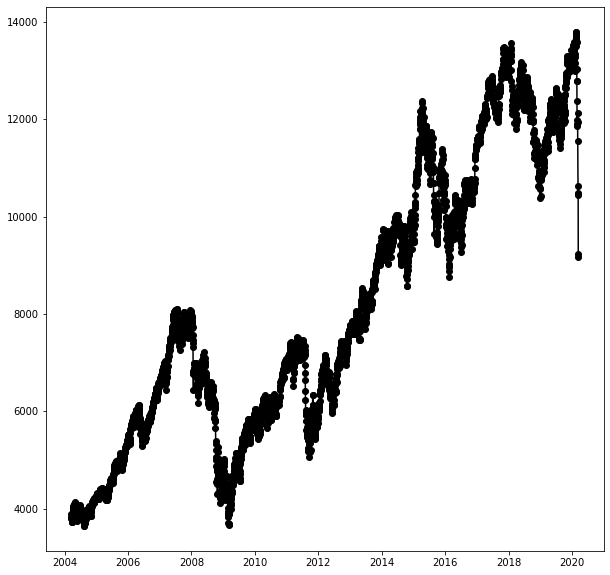

In [24]:
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(data['Date'],data['Close'], color='k',marker='o')

6. Additive and multiplicative time series
Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

In [12]:
Close_data = data['Close']
#Close_data = data.interpolate(method='polynomial', order=1)

Close_data.index = pd.date_range(freq='D',start=data['Date'][0], periods=len(data['Date']))

result_mul = seasonal_decompose(Close_data.values, model='multiplicative', extrapolate_trend='freq', freq=100)

Text(0.5, 0.98, 'Multiplicative Decompose')

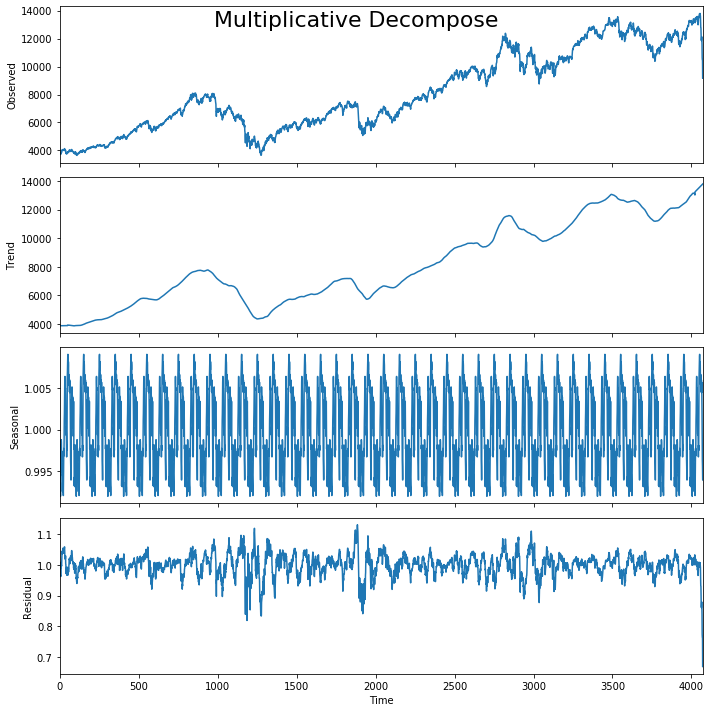

In [13]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

Text(0.5, 0.98, 'Additive Decompose')

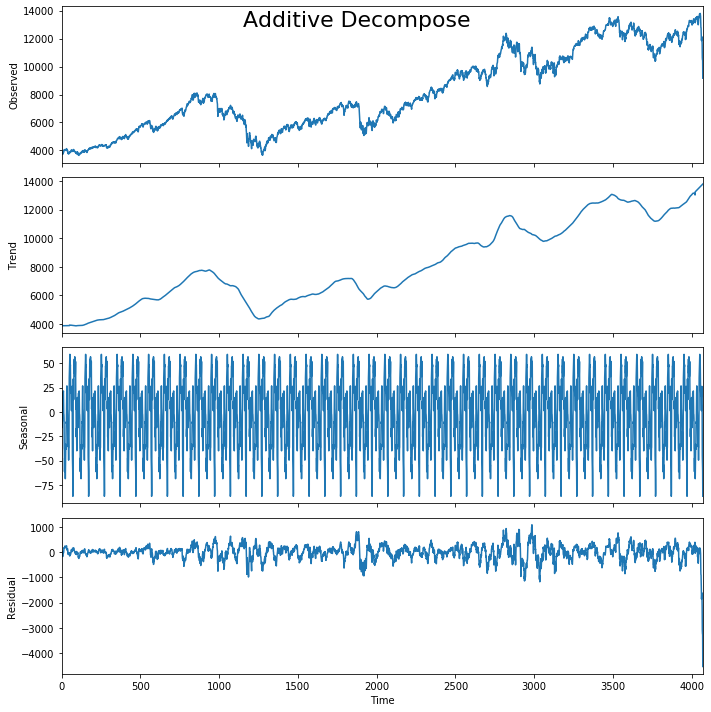

In [14]:
result_add = seasonal_decompose(Close_data.values, model='additive', extrapolate_trend='freq', freq=100)

plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)

In [15]:
#data_array = np.array(result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed)
print(result_mul.seasonal.T.shape)
df_reconstructed = pd.DataFrame([result_mul.seasonal[:], result_mul.trend[:], result_mul.resid[:], result_mul.observed[:]])
df_reconstructed.head()

(4073,)


,0,1,2,3,4,5,6,7,8,9,...,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072
0,0.998135,0.997252,0.994522,0.993591,0.993618,0.991957,0.994229,0.996931,0.994890,0.995920,...,1.005986,1.004456,1.005708,1.003874,1.002196,0.998615,0.996373,0.995515,0.993943,0.993923
1,3884.066967,3884.288811,3884.510655,3884.732499,3884.954343,3885.176187,3885.398031,3885.619875,3885.841719,3886.063563,...,13693.562070,13704.833258,13716.104447,13727.375636,13738.646824,13749.918013,13761.189202,13772.460390,13783.731579,13795.002768
2,0.982960,0.986771,1.008687,0.991604,0.989376,0.967644,0.965271,0.961891,0.986015,0.987629,...,0.860792,0.870658,0.879175,0.866781,0.838261,0.773805,0.764005,0.761353,0.668684,0.673326
3,3810.760010,3822.370117,3896.790039,3827.429932,3819.149902,3729.229980,3728.820068,3726.070068,3811.919922,3822.330078,...,11857.870117,11985.389648,12127.690430,11944.719727,11541.870117,10625.019531,10475.490234,10438.679688,9161.129883,9232.080078


Loss 2008-01-18 00:00:00
Win 2008-01-23 00:00:00
Win 2008-09-18 00:00:00
Loss 2008-10-03 00:00:00
Loss 2008-10-07 00:00:00
Loss 2008-10-09 00:00:00
Win 2008-10-10 00:00:00
Loss 2008-10-14 00:00:00
Win 2008-10-27 00:00:00
Loss 2008-11-05 00:00:00
Loss 2008-11-10 00:00:00
Win 2008-11-21 00:00:00
Loss 2008-11-28 00:00:00
Win 2008-12-05 00:00:00
Win 2009-03-03 00:00:00
Loss 2009-03-04 00:00:00
Win 2009-03-09 00:00:00
Loss 2009-03-27 00:00:00
Win 2009-04-01 00:00:00
Win 2010-05-07 00:00:00
Loss 2011-08-05 00:00:00
Loss 2011-08-09 00:00:00
Loss 2011-08-17 00:00:00
Loss 2011-09-02 00:00:00
Win 2011-09-26 00:00:00
Loss 2011-09-30 00:00:00
Win 2011-10-26 00:00:00
Loss 2016-06-23 00:00:00
Loss 2020-03-06 00:00:00
Loss 2020-03-11 00:00:00


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,
          3.,   0.,   1.,   0.,   2.,   1.,   0.,   3.,   9.,   3.,   2.,
          2.,   5.,   3.,   3.,  20.,  12.,  17.,  24.,  41.,  38.,  61.,
         80., 102., 134., 154., 189., 261., 379., 416., 501., 378., 325.,
        226., 163., 135., 108.,  65.,  42.,  49.,  28.,  26.,  15.,   9.,
         11.,   1.,   2.,   1.,   2.,   1.,   4.,   0.,   5.,   1.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          2.]),
 array([-0.12238615, -0.12002209, -0.11765803, -0.11529398, -0.11292992,
        -0.11056586, -0.10820181, -0.10583775, -0.10347369, -0.10110964,
        -0.09874558, -0.09638152, -0.09401747, -0.09165341, -0.08928935,
        -0.0869253 , -0.08456124, -0.08219718, -0.07983313, -0.07746907,
        -0.07510501, -0.07

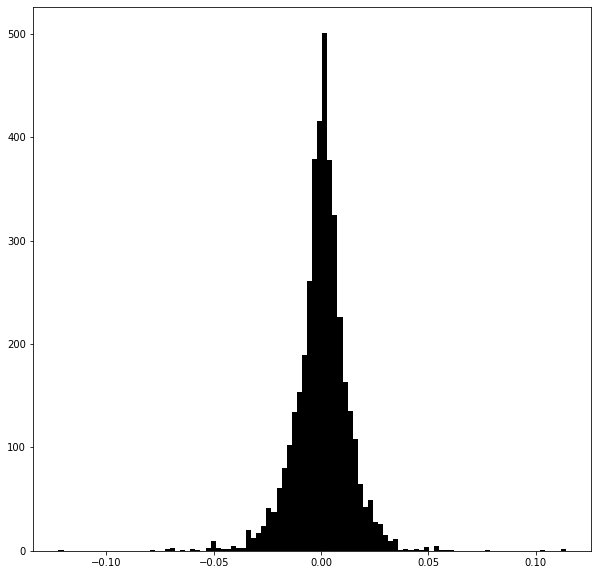

In [37]:
daily_change = []
for i in range(0,len(Close_data)-1):
    daily_change.append((Close_data[i+1]-Close_data[i])/Close_data[i])
    if((Close_data[i+1]-Close_data[i])/Close_data[i])>0.05:
            print('Win '+str(data['Date'][i]))
    if((Close_data[i+1]-Close_data[i])/Close_data[i])<-0.05:
            print('Loss '+str(data['Date'][i]))
        
daily_change.append(0)

plt.hist(daily_change, color='k',bins=100)

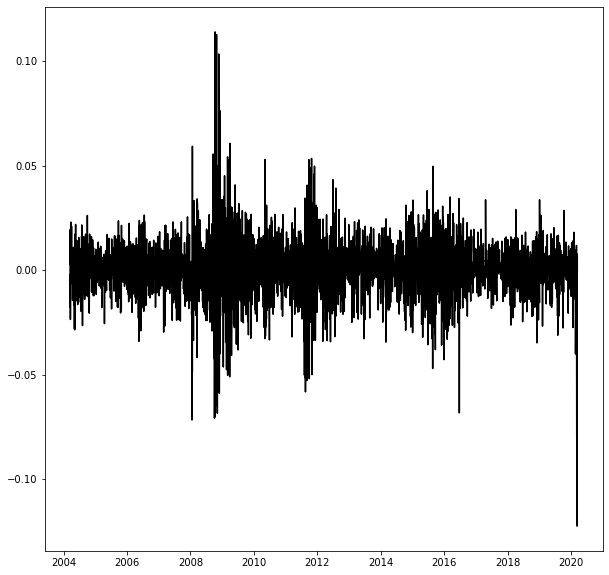

In [28]:
plt.plot(data['Date'],daily_change, color='k')

ValueError: x and y must have same first dimension, but have shapes (4073,) and (4064,)

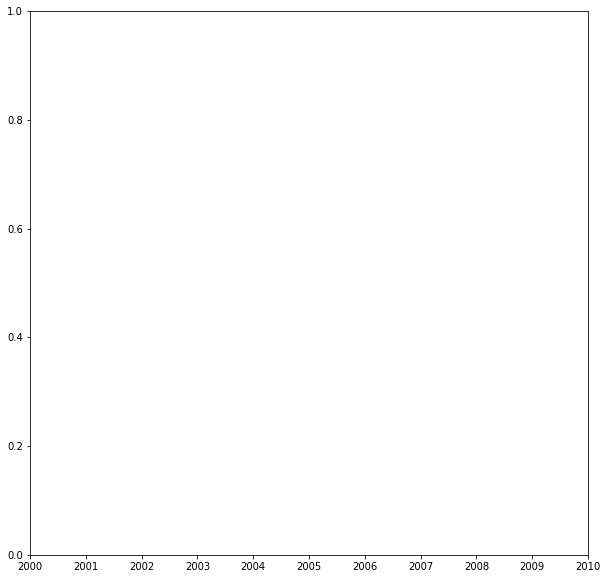

In [48]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

MA_Dax = movingaverage(daily_change,10)
plt.plot(data['Date'],MA_Dax, color='k')